This Jupyter Notebook demonstrates the application of the Hough Transform for detecting circles in images. The project uses Python, OpenCV, and matplotlib.

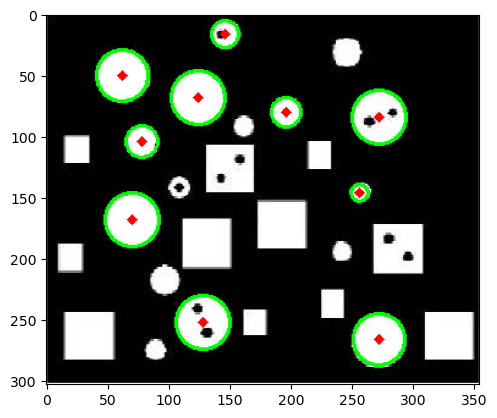

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('.\Data\Picture1.jpg', cv2.IMREAD_COLOR)  # Use color image for boundary drawing

# Convert the image to grayscale for circle detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and help the HoughCircles function
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Use HoughCircles to detect circles in the image
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp=1,  # Inverse ratio of accumulator resolution to image resolution
    minDist=50,  # Minimum distance between the centers of detected circles
    param1=50,  # Gradient value used in the edge detection
    param2=30,  # Accumulator threshold for circle detection
    minRadius=1,  # Minimum radius of the detected circle (adjusted for smaller circles)
    maxRadius=100  # Maximum radius of the detected circle
)

# If circles are found, draw a boundary around them on the original image
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the boundary around the circle
        cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying with matplotlib
plt.show()
